# Comparing SGS

This notebook compares turbulent statistics simulated in [Oceananigans](https://clima.github.io/OceananigansDocumentation/stable/) using different sub-grid scale closure schemes.

In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../lesview')
from lesview import *

In [2]:
# load data
casename = 'R7_BF05WD10WV00'
advection_schemes = ['AMD', 'noSGS']
filename = 'averages.jld2'

ds = {}
for key in advection_schemes:
    filepath = '../oceananigans/sgs/{:s}_{:s}/{:s}'.format(casename, key, filename)
    ds[key] = OceananigansDataProfile(filepath=filepath)

Variable 't' has dimension 1. Skipping.
Variable 't' has dimension 1. Skipping.


In [3]:
ustar = 0.012 # m/s
Q0 = 5/1000/4200
alpha = 2e-4
g = 9.81
B0 = Q0*g*alpha
Tstar = Q0/ustar
NNT0 = 0.01

In [4]:
# one inertial period (17 hours)
startdate = '2000-01-01T10:00:00'
enddate = '2000-01-02T03:00:00'
tslice = slice(startdate, enddate)

In [5]:
oceananigans_var = {
               'T':       'T',
               'u':       'u',
               'v':       'v',
               'u2':      'uu',
               'v2':      'vv',
               'w2':      'ww',
               'tke':     'tke',
               'uw':      'wu',
               'vw':      'wv',
               'wb':      'wt',
               't2':      'tt',
               'w3':      'w3'}

In [6]:
def cmp_var(ds, var, units, levels, depth=-70, tslice=tslice, cmap='viridis'):
    ds2 = {}
    for key in ds.keys():
        if var == 'tke':
            # compute TKE
            uu = ds[key].dataset.data_vars['uu'].sel(time=tslice)
            vv = ds[key].dataset.data_vars['vv'].sel(time=tslice)
            ww = ds[key].dataset.data_vars['ww'].sel(time=tslice)
            tmp = 0.5*(uu+vv+ww.interp(zi=uu.z))
        else:
            tmp = ds[key].dataset.data_vars[oceananigans_var[var]].sel(time=tslice)
        if var == 'wb':
            # convert temperature flux to buoyancy fluxe
            tmp = tmp*g*alpha
        ds2[key] = tmp
        
    fig1, axarr = plt.subplots(2, 2, sharey='row', sharex='col')
    fig1.set_size_inches([12, 6])
    for i, key in enumerate(ds.keys()):
        m = i//2
        n = i%2
        ax = axarr[m][n]
        im = ds2[key].plot(ax=ax, levels=levels, add_colorbar=False, cmap=cmap)
        ax.set_ylim([depth, 0])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title(key)
        if n == 0:
            ax.set_ylabel('depth (m)')

    plt.subplots_adjust(left=0.1, right=0.86, bottom=0.1, top=0.92, hspace=0.2, wspace=0.1)

    # colorbar
    cax = plt.axes([0.8, 0.1, 0.1, 0.8])
    cax.set_visible(False)
    cb = plt.colorbar(im, ax=cax)
    cb.formatter.set_powerlimits((-2, 3))
    cb.set_label(var+' ('+units+')')

    fig2 = plt.figure(figsize=[6,4])
    linestyles = ['-', '--', ':', '-.']
    for i, key in enumerate(ds.keys()): 
        ds2[key].mean(dim='time').plot(y=ds2[key].dims[0], color='k', linestyle=linestyles[i], label=key)
    vmin = np.min(levels)
    vmax = np.max(levels)
    plt.ylim([depth, 0])
    plt.xlim([vmin, vmax])
    plt.xlabel(var+' ('+units+')')
    plt.ylabel('Depth (m)')
    plt.title('Time averaged')
    plt.legend()

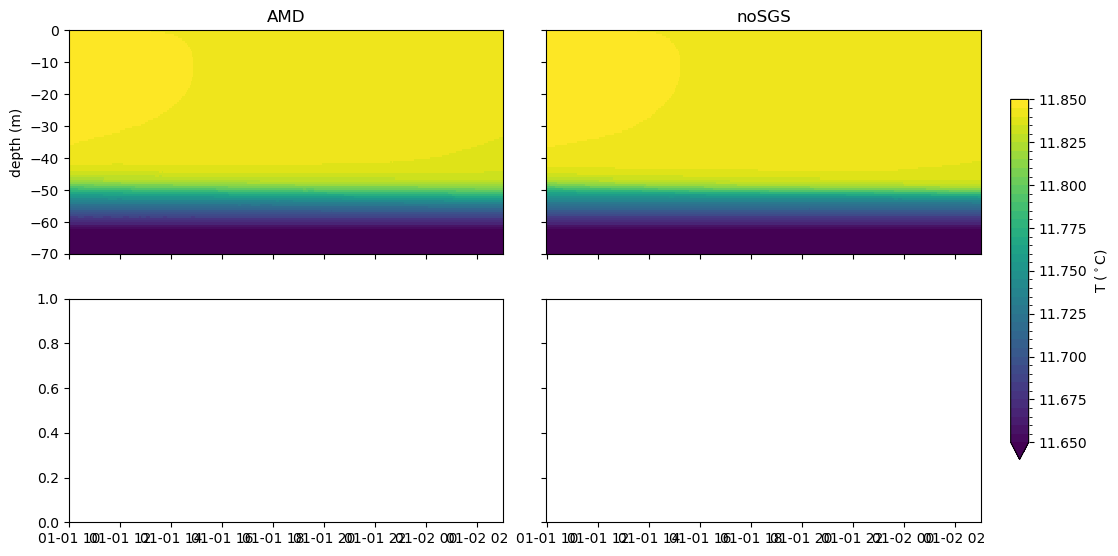

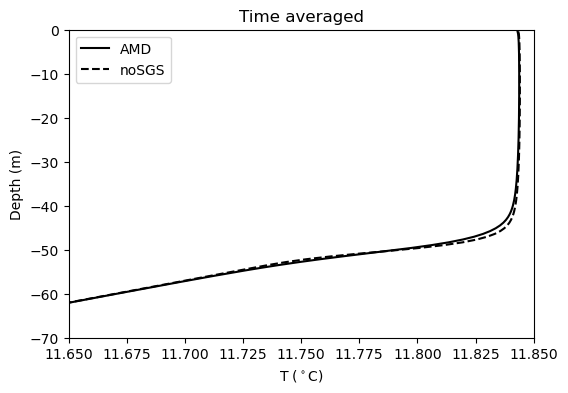

In [7]:
var = 'T'
units = '$^\circ$C'
levels = np.linspace(11.65, 11.85, 41)
# levels = None
cmp_var(ds, var, units, levels, cmap='viridis')

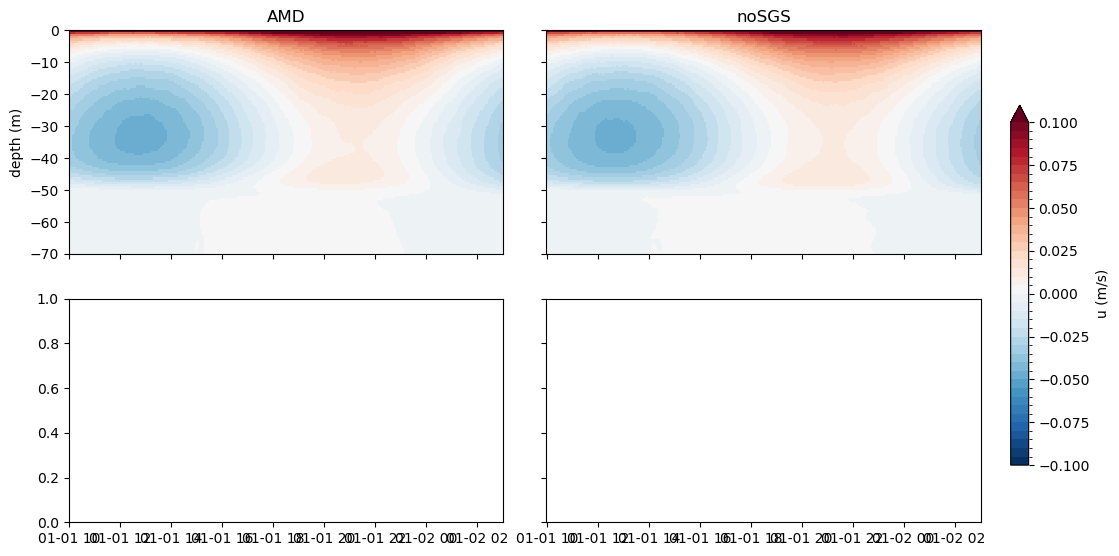

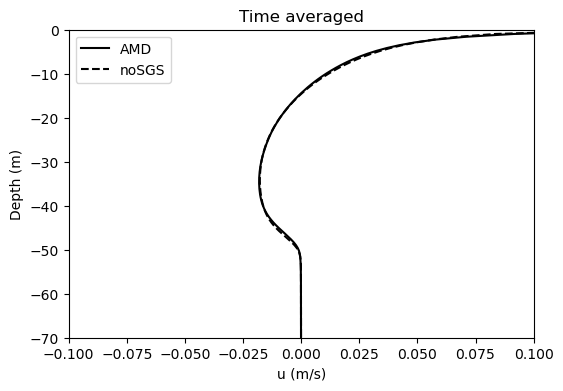

In [8]:
var = 'u'
units = 'm/s'
levels = np.linspace(-0.1, 0.1, 41)
cmp_var(ds, var, units, levels, cmap='RdBu_r')

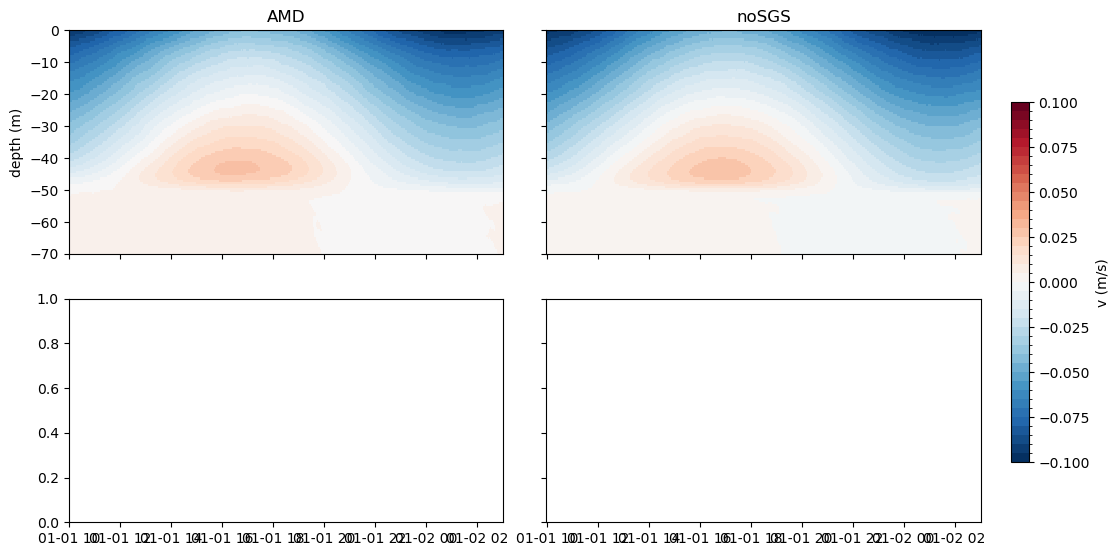

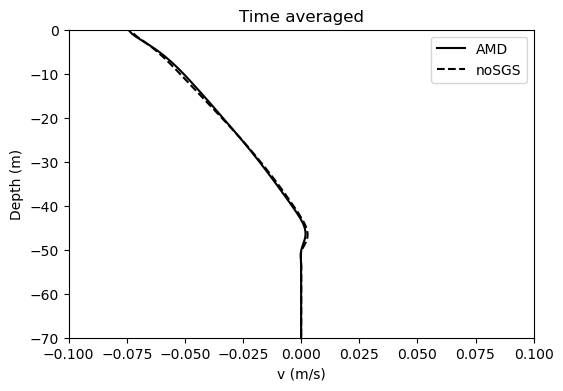

In [9]:
var = 'v'
units = 'm/s'
levels = np.linspace(-0.1, 0.1, 41)
cmp_var(ds, var, units, levels, cmap='RdBu_r')

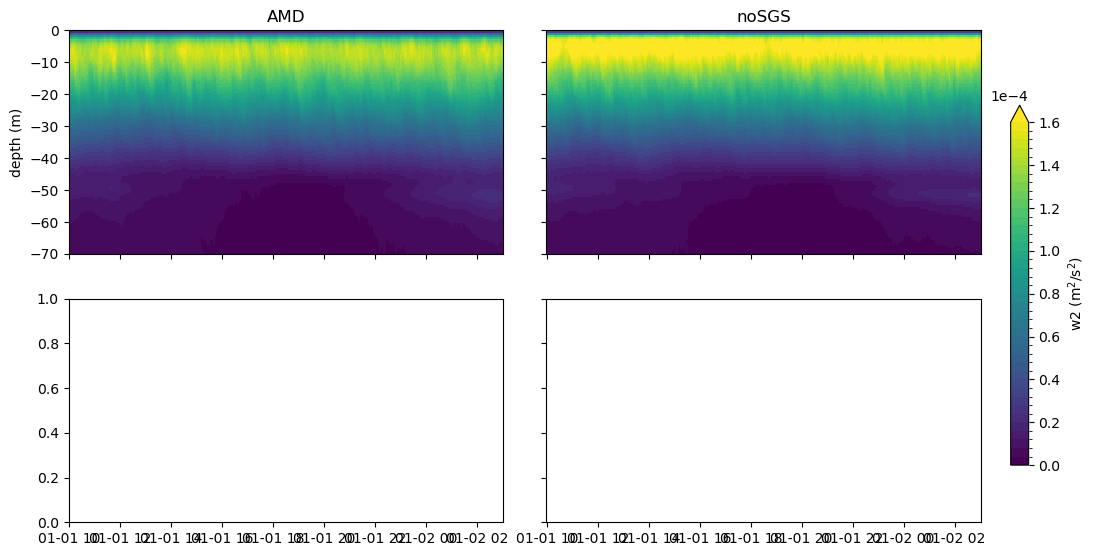

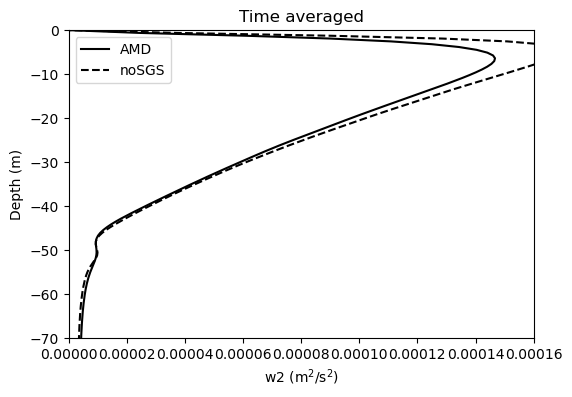

In [10]:
var = 'w2'
units = 'm$^2$/s$^2$'
levels = np.linspace(0, 1.6e-4, 41)
cmp_var(ds, var, units, levels)

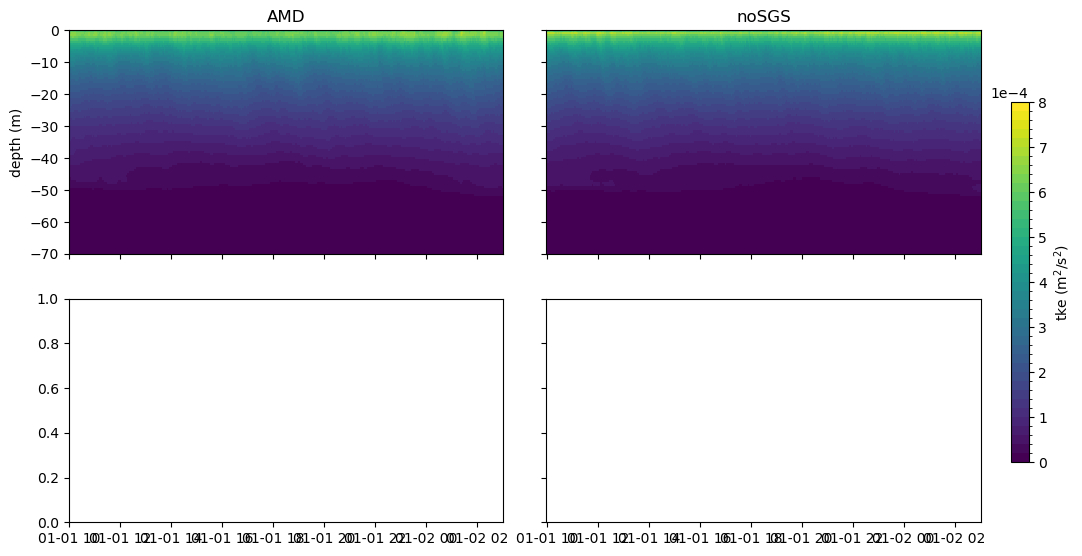

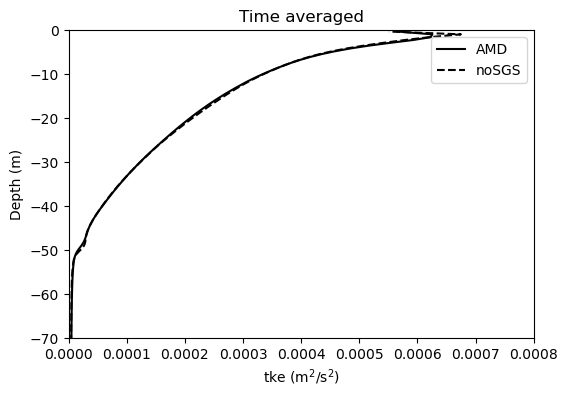

In [11]:
var = 'tke'
units = 'm$^2$/s$^2$'
levels = np.linspace(0, 8e-4, 41)
cmp_var(ds, var, units, levels)

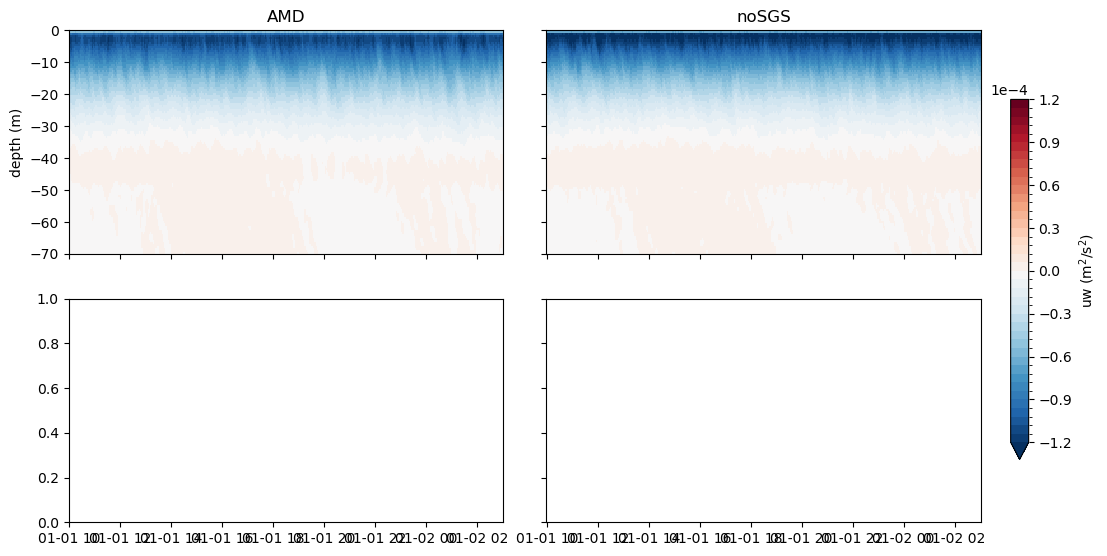

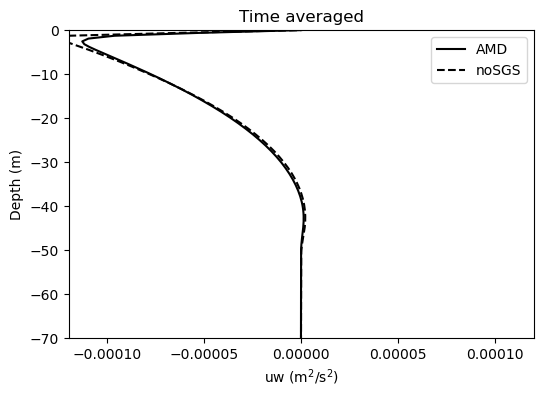

In [12]:
var = 'uw'
units = 'm$^2$/s$^2$'
levels = np.linspace(-1.2e-4, 1.2e-4, 41)
cmp_var(ds, var, units, levels, cmap='RdBu_r')

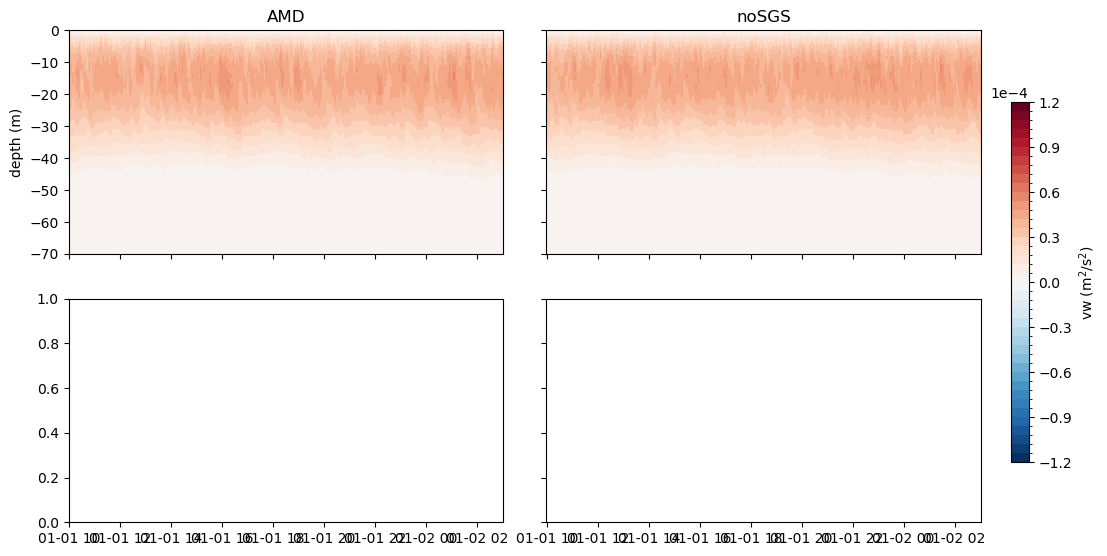

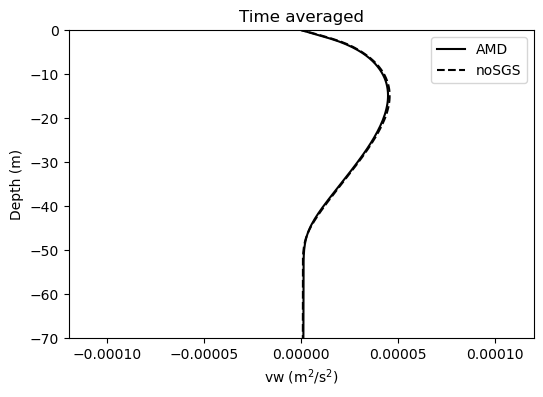

In [13]:
var = 'vw'
units = 'm$^2$/s$^2$'
levels = np.linspace(-1.2e-4, 1.2e-4, 41)
cmp_var(ds, var, units, levels, cmap='RdBu_r')

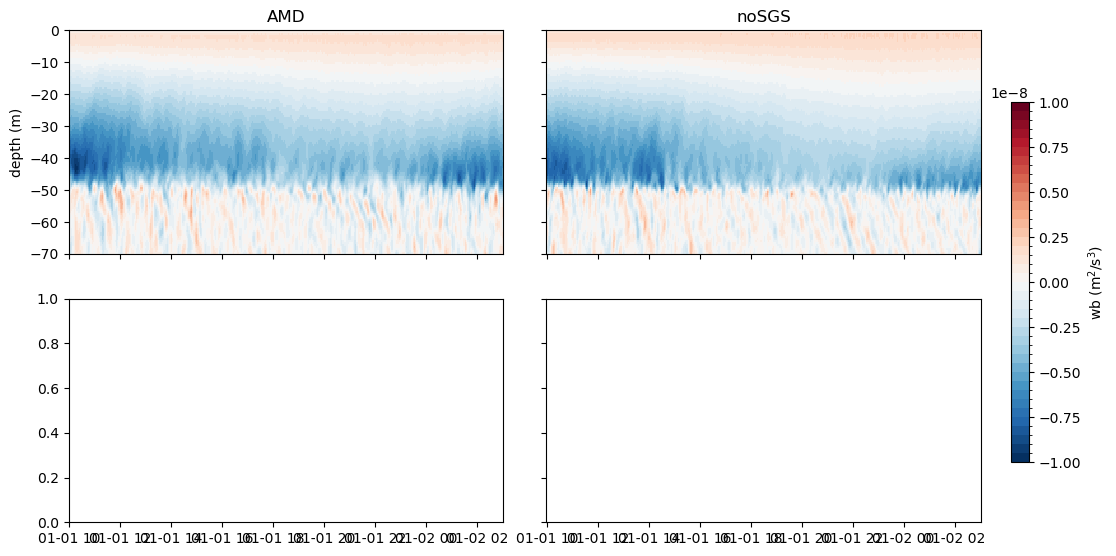

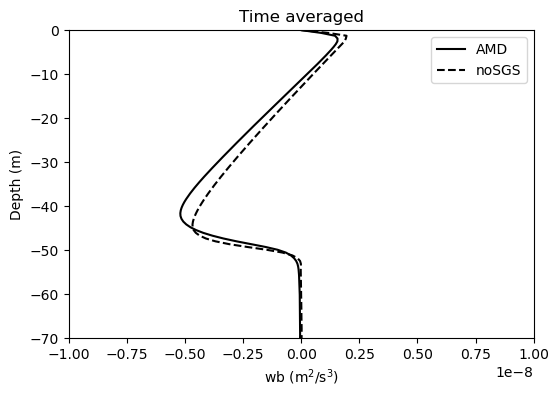

In [14]:
var = 'wb'
units = 'm$^{2}$/s$^{3}$'
levels = np.linspace(-1e-8, 1e-8, 41)
# levels = None
cmp_var(ds, var, units, levels, cmap='RdBu_r')

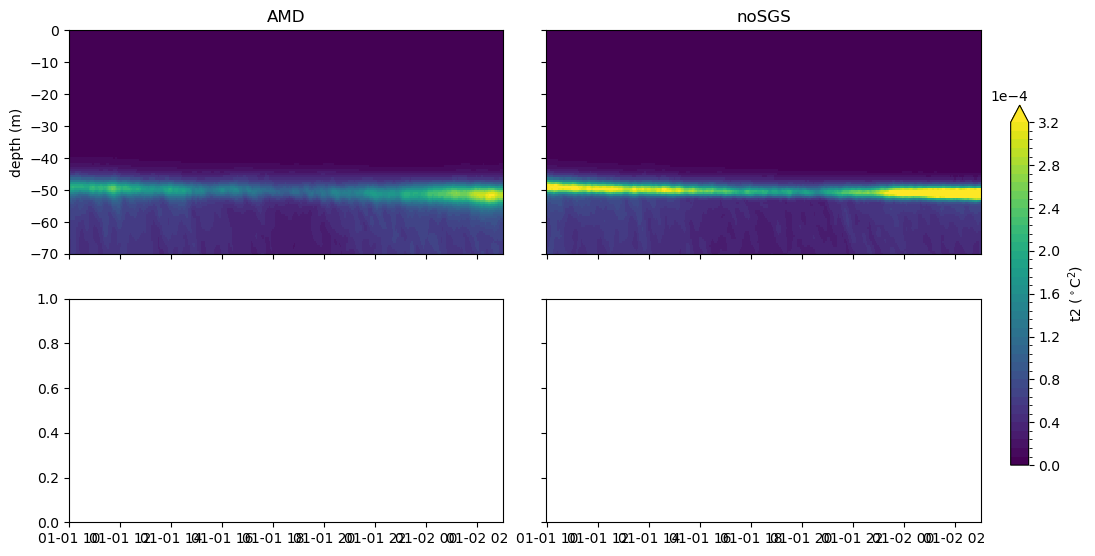

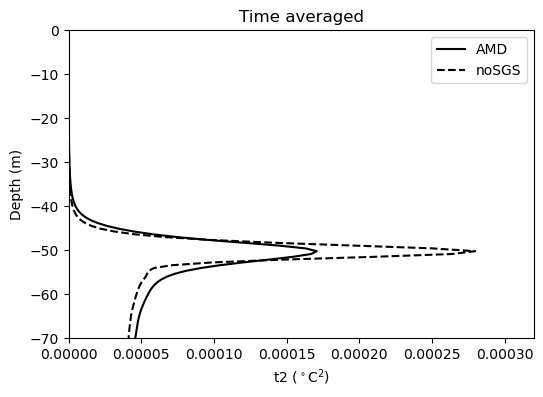

In [15]:
var = 't2'
units = '$^\circ$C$^2$'
levels = np.linspace(0, 3.2e-4, 41)
# levels = None
cmp_var(ds, var, units, levels)

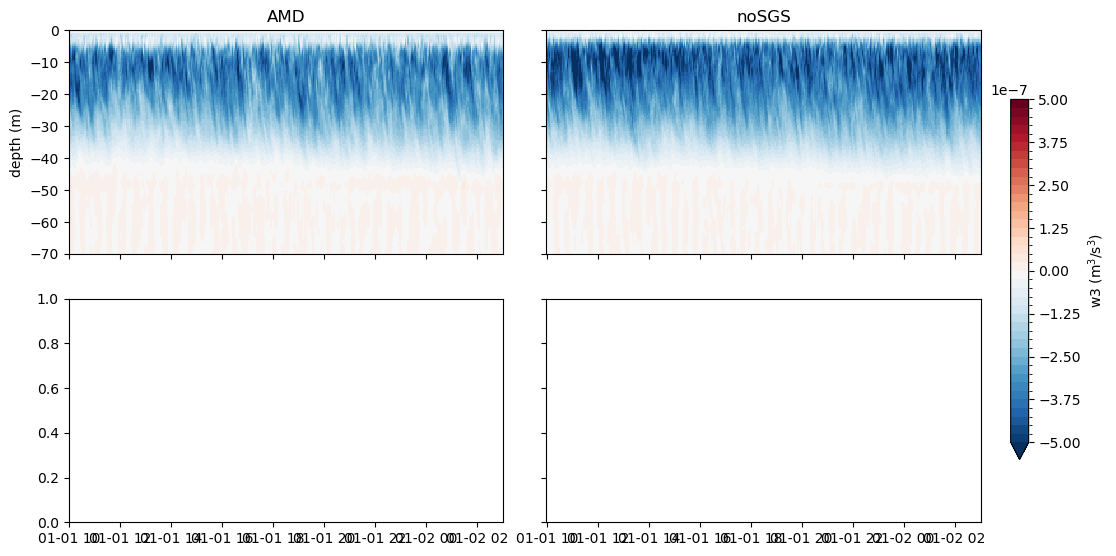

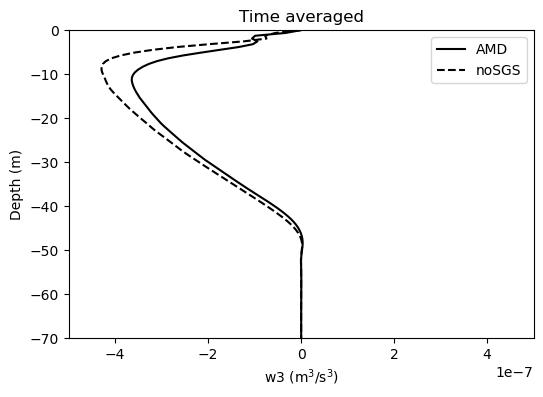

In [16]:
var = 'w3'
units = 'm$^3$/s$^3$'
levels = np.linspace(-5e-7, 5e-7, 41)
# levels = None
cmp_var(ds, var, units, levels, cmap='RdBu_r')